# Un progetto dall'inizio alla fine: lavoriamo con dati reali

Siete stati assunti come Data Specialist da una azienda che svolge analisi statistiche del mercato immobiliare americano. Ecco gli step che realizzeremo in questo progetto: Il vostro compito e' predirre il prezzo di una casa in california dato il numero di stanze e la posizione e altre carateristiche. <br>

La checklist semplificata del progetto sara':

- [] Guardiamo al quadro generale (Big Picture)
- [] Procuriamoci i dati
- [] Analizziamo e visualizziamo i dati per acquisirne consapevolezza
- [] Prepara i dati per l'algoritmo di Machine Learning
- [] Seleziona il modello e addesteralo
- [] Ottimizza il modello con una messa a punto 
- [] Presenta la soluzione
- [] Lancia, Monitora e Mantieni il tuo modello

## 1 - The Big Picture, inquadriamo il problema
### 1.1 - La fonte dei dati:
- Repository popolari:
    - [Irvine](https://archive.ics.uci.edu)
    - [Kaggle](https://www.kaggle.com)
    - [Amazone AWS](https://registry.opendata.aws)
- Meta Portali:
    - [Data Portals](https://dataportals.org)
    - [Open Data Watch](https://opendatawatch.com/monitoring/)
    - [Quandl](https://data.nasdaq.com/publishers/QDL)
- Raccolte di link a repo:
    - [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
    - [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
    - [Reddit](https://www.reddit.com/r/datasets/) 

### 1.2 - Procuriamoci i dati:
Per il download dei dati da web e' sempre conveniente scrivere una funzione che possa essere richiamata in automatcoa seconda delle esigenze.


In [1]:
# Download dei dati
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    """
    Carica il dataset degli alloggi.

    Output:
    DataFrame: Un DataFrame di pandas contenente i dati degli alloggi.

    Descrizione:
    Questa funzione verifica se il file 'housing.tgz' esiste nel percorso specificato. 
    Se il file non esiste, lo scarica da un URL fornito, lo estrae e legge il file CSV 
    'housing.csv' da una directory specificata, restituendo infine i dati in un DataFrame di pandas.
    """

    # Percorso del file tarball
    tarball_path = Path("datasets/housing.tgz")

    # Se il file non esiste, scarica ed estrai i dati
    if not tarball_path.is_file():
        # Crea la directory se non esiste
        Path("datasets").mkdir(parents=True, exist_ok=True)
        
        # URL da cui scaricare i dati
        url = "https://github.com/ageron/data/raw/main/housing.tgz"

        # Scarica il file tarball
        urllib.request.urlretrieve(url, tarball_path)

        # Estrae il file tarball
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    
    # Legge il file CSV e lo restituisce come un DataFrame
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Analisi e valutazione dei dati
Significato di ciscuna colonna
-   **longitude:** longitudine della posizione dell'alloggio
-   **latitude:** latitudine della posizione dell'alloggio
-   **housing_median_age:** età media degli alloggi nella zona
-   **total_rooms:** numero totale di stanze nell'alloggio
-   **total_bedrooms:** numero totale di camere da letto nell'alloggio
-   **population:** popolazione totale nella zona
-   **households:** numero totale di famiglie nella zona
-   **median_income:** reddito medio delle famiglie nella zona
-   **median_house_value:** valore medio delle case nella zona
-   **ocean_proximity:** prossimità all'oceano

In [2]:
# Il metodo *info*
# Per un dettaglio del contenuto, tipo, caratteristiche ecc..
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Prime osservaizoni
-   Il DataSet ha 20640 istanze
-   *total_bedrooms* presenta solo 20433 valori non "null". --> Questa colonna sara' da rivedere
-   tutti i dati sono numerici tranne quelli contenuti su *ocean_proximity* presenta dati non numerici.

In [3]:
# Attributi discreti:
# Diamo subito un'occhiata al contenuto di ocean proximity:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
# Il metodo *Describe*
# Diamo un'occhiata a tutti i campi usando il metodo *describe*:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


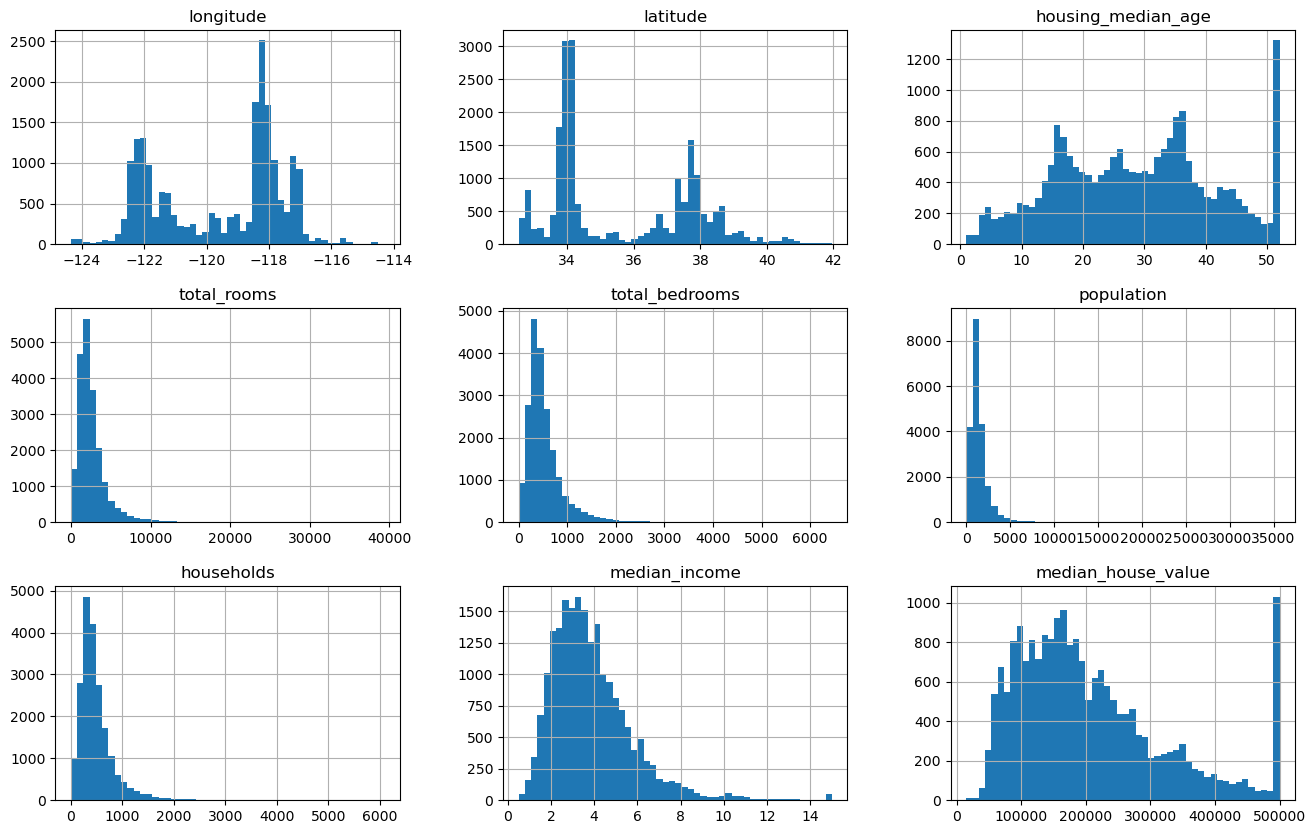

In [5]:
# un altro modo per dare una rapida occhiata e' visualizzare gli istogramma dei dati numerici:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(16,10))
# le bins sono il numero di colonne con cui rappresentare l'istogramma.

plt.show()

Osservazioni sugli istogramma:
-   *median_income* varia da poco oltre le 0. fino a massimo 15. I valori, dopo aver consultato chi ha raccolto i dati, si scopre rappresentano il reddito medio in migliaia di dollari annui.
-   *median_income* presenta valore massimo pari a 15. Questo raccoglie ancche tutta la coda oltre i 15.
-   *median_house_value* e *house_median_age* sono entrambi capped. Questo e' un problema in particolare per il *median_hause_value* poiche' rappresenta anche l'obiettivo della nostra ricerca. Il nostro algoritmo di ML non sara' in grado di definire un valore per una abitazione superiore ai 500k poiche' i nostri dati non presentano alcuna istanza con questi valori. L'algoritmo potra' pensare che non esistono valori superiori. Se servono quindi dati piu' precisi anche per istanze che supernao il cap, le soluzioni sono:
    - procurarsi dati specifici per ciascuna istanza del dataset con valore superiore al cap
    - escluderi le istanze con valore superiore ai 500k dal dataset
-   Tutti gli ttributi sono a scale differenti
-   Molte feature hanno code lunghe, rompendo la simmetria di una perfetta campana. Alcuni algoritmi potrebbero faticare a riconoscere i pattern in queste condizioni.     


## Creazione di un TestSet
Prima guardare oltre nei dati e' molto importante separare una certa qauntita' di dati e metterla da parte senza toccarla. <br>
Sarebbe importante che il test set sia mediamente rappresentativo di ciascun attributo. Se il dataset non e' molto grande potrebbe essere necessario crare un test set stratifiato.  

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train), len(test))

16512 4128


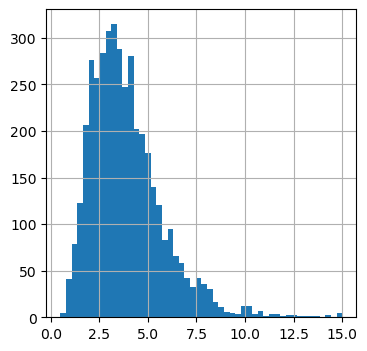

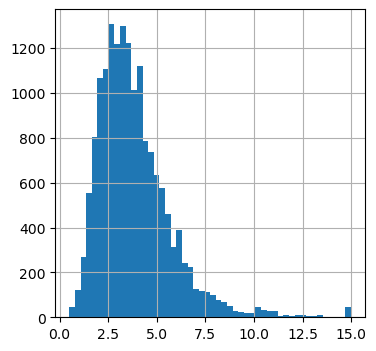

In [7]:
test["median_income"].hist(bins=50,figsize=(4,4))
plt.show()
train["median_income"].hist(bins=50,figsize=(4,4))
plt.show()

In [8]:
import numpy as np
# Se volessi stratificare meglio posso sddividere il dataset in base al valore di alcuni attributi:
housing["inocome_category"] = pd.cut(housing["median_income"],
                                     bins=[0, 1.5, 3, 4.5, 6, 7.5, np.inf],
                                     labels=[1,2,3,4,5,6])

<Axes: >

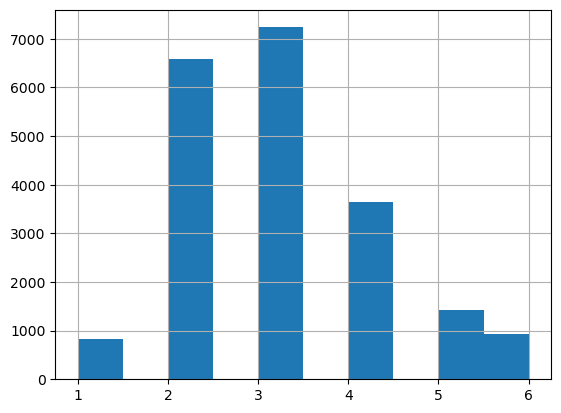

In [9]:
housing["inocome_category"].hist()

In [10]:
# avendo suddiviso il datast in 6 categorie inbase al reddito medio posso creare 
# testset e training set uniformando le categorie

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["inocome_category"]):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]


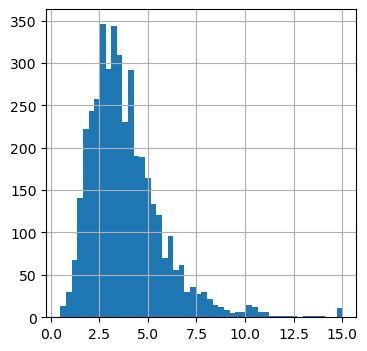

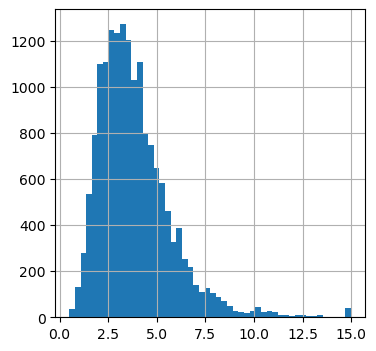

In [12]:
strat_test["median_income"].hist(bins=50,figsize=(4,4))
plt.show()
strat_train["median_income"].hist(bins=50,figsize=(4,4))
plt.show()

# TODO: rimuovere la colonna income_category

## Exploring Data

In [13]:
# Mettere da parte il test set e non guardarlo piu':

housing = strat_train.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

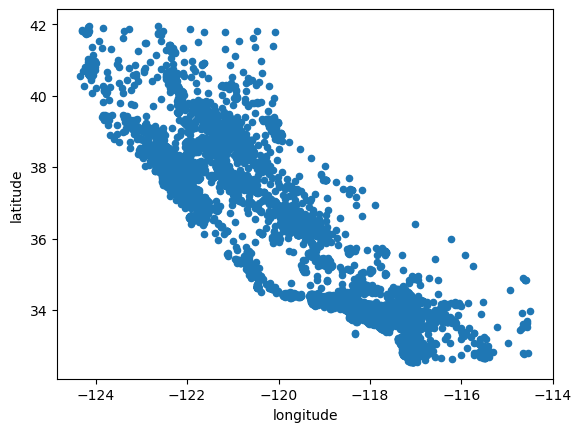

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

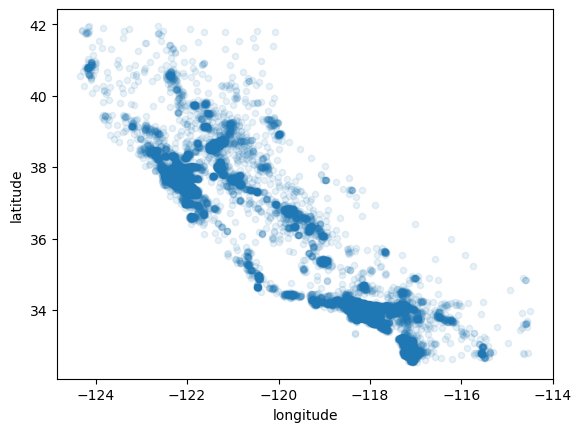

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

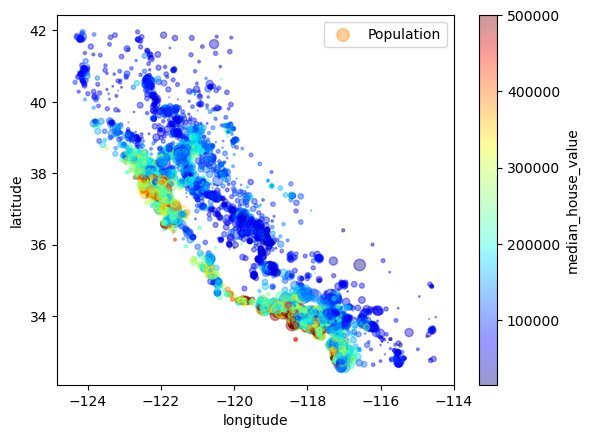

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="Population", 
             c="median_house_value", cmap=plt.get_cmap("jet"))

## Correlations

In [28]:
housing = housing.drop(columns='inocome_category')

In [35]:
corr_columns = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

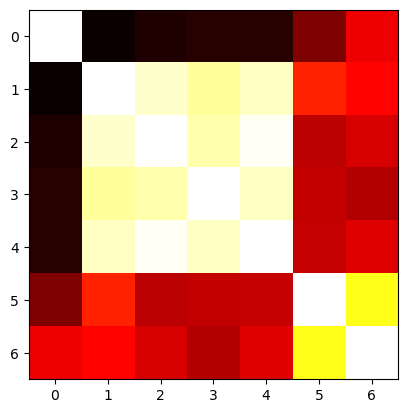

In [36]:
correlations = housing[corr_columns].corr()

plt.imshow(correlations, cmap='hot', interpolation='nearest')
plt.show()

<Axes: >

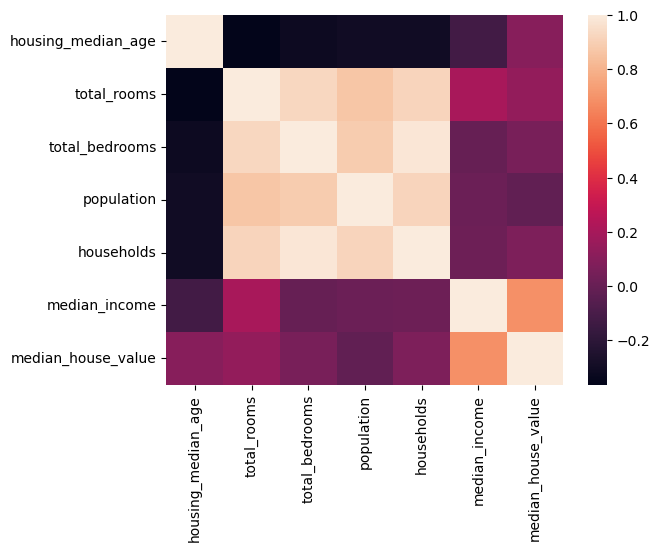

In [37]:
import seaborn as sns


# plot the heatmap
sns.heatmap(correlations)

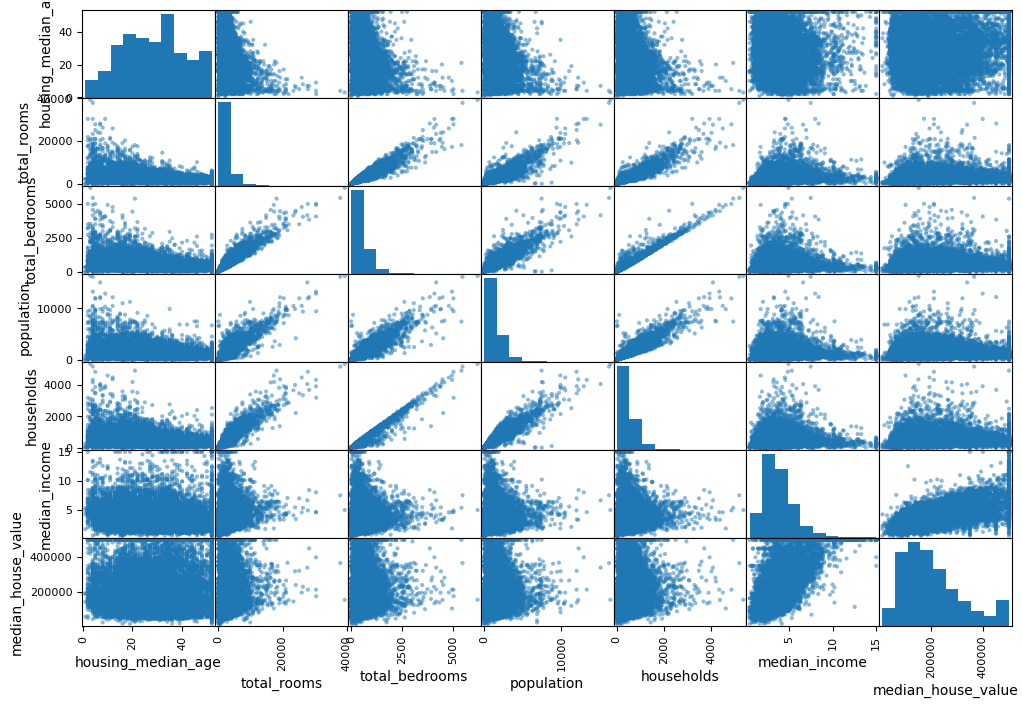

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[corr_columns], figsize=(12,8))
plt.show()